# Demo of the LAMINAR package

In [1]:
import LAMINAR

import torch
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_moons

In [2]:
# make moon dataset

X, _ = make_moons(n_samples=2500, noise=0.1)
X = (X - X.mean(axis=0)) / X.std(axis=0)

# make a tensor
data = torch.tensor(X, dtype=torch.float32)
data.shape

torch.Size([2500, 2])

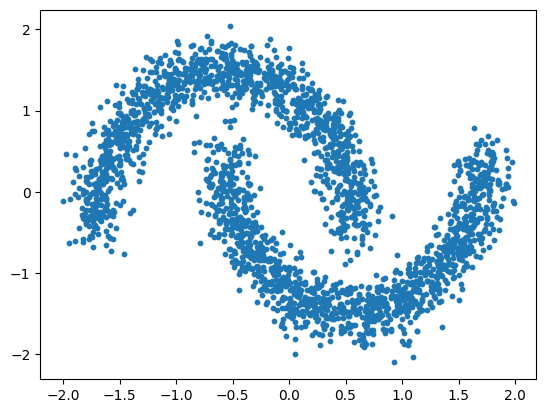

In [3]:
# visualize the dataset

plt.scatter(X[:, 0], X[:, 1], s=10);

In [4]:
# initialize the LAM class

hyperparameters = {
    'hidden_dim': 32,
    'width': 64,
    'timesteps': 50,
    'learning_rate': 5e-3,
    'patience': 50,
    'sig': 3,
    'batch_size': 256,
}

LAM = LAMINAR.LAMINAR(data, epochs=500, k_neighbours=25, hyperparameters=hyperparameters)

LAM.p_value()

Epoch 271 | Loss: 1.8422:  54%|█████▍    | 270/500 [10:48<09:12,  2.40s/it]


Early stopping at epoch 271
Henze-Zirkler p-value:	2.2158505841038595e-05


2.2158505841038595e-05

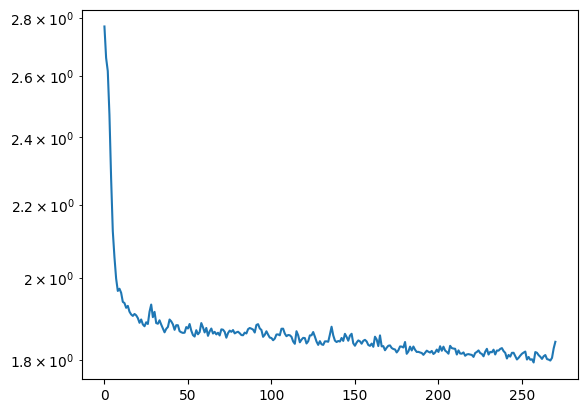

In [5]:
plt.plot(LAM.loss_history)
plt.yscale('log')

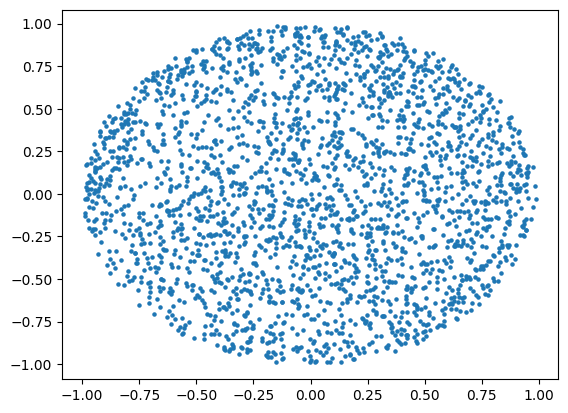

In [6]:
# visualize the pushed data
plt.scatter(LAM.data_pushed[:, 0], LAM.data_pushed[:, 1], s=5);

In [7]:
# default nearest neighbours of point with index 0
LAM.query(0)

([array([   0, 2491, 2407,  660, 1930,  214, 1872,  648,  892,  849,  424,
         2105,  751, 1458,  151, 1213, 1716,  889, 2289, 1307, 1995,  373,
          818, 1785,  499], dtype=int64)],
 [array([0.        , 0.17102857, 0.1852219 , 0.34172204, 0.42299964,
         0.43715483, 0.4407407 , 0.4502501 , 0.47219494, 0.47966999,
         0.49445195, 0.50385435, 0.50911852, 0.51155626, 0.52039069,
         0.52575545, 0.5261495 , 0.53438595, 0.54863201, 0.55621566,
         0.55999515, 0.56500968, 0.57225178, 0.57736036, 0.57778656])])

In [8]:
# query the 5 nearest neighbours of the points [0, 2, 5]
LAM.query(np.array([0, 2, 5]) , k_neighbours=5)

([array([   0, 2491, 2407,  660, 1930], dtype=int64),
  array([   2, 1425, 2221, 1447,  326], dtype=int64),
  array([   5,  171,  425,   77, 1443], dtype=int64)],
 [array([0.        , 0.17102857, 0.1852219 , 0.34172204, 0.42299964]),
  array([0.        , 0.02191269, 0.03236565, 0.05529296, 0.05926853]),
  array([0.        , 0.00751224, 0.01015642, 0.01379099, 0.02317925])])

In [9]:
# calculate the distance between the points 0 and 5
dist, path = LAM.distance(0, 5, return_path=True)
print(dist)

1.4515439099632204


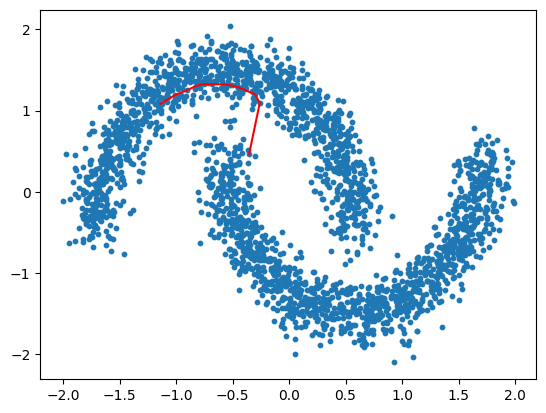

In [10]:
#plot data, and the shortest path between the points 0 and 5
plt.scatter(X[:, 0], X[:, 1], s=10)
plt.plot(X[path, 0], X[path, 1], 'r')
plt.show()

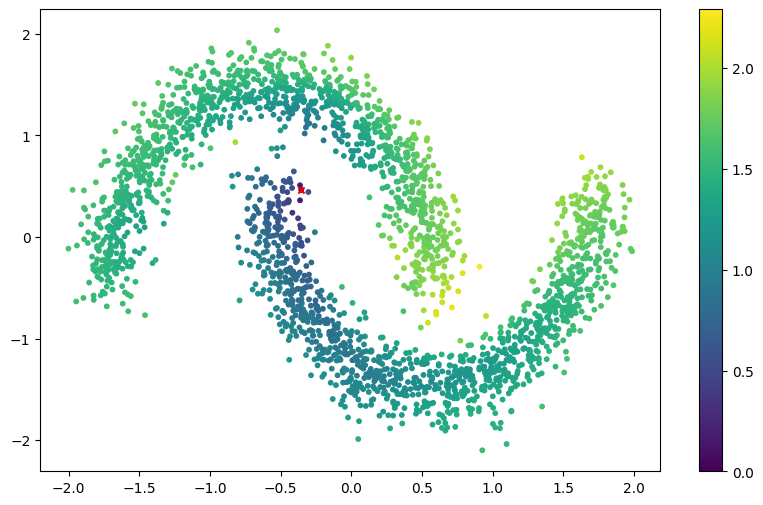

In [11]:
# calculate the distance to all points from the point 0 and plot

start_point = 0

dist = LAM.distance(start_point)

fig, ax = plt.subplots(figsize=(10, 6))

plot = ax.scatter(X[:, 0], X[:, 1], c=dist, cmap='viridis', s=10, vmin=0, vmax=dist.max())
ax.scatter(X[start_point, 0], X[start_point, 1], c='r', s=20, marker='x')
plt.colorbar(plot)
plt.show()


In [12]:
point = torch.tensor(X[0].reshape(1, -1), dtype=torch.float32)
LAM.jacobian(point)

tensor([[ 0.8433, -0.2477],
        [ 0.3121, -0.0130]])